In [22]:
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
nottem = pd.read_csv("nottem.csv", header=0, parse_dates=[0], names=['Month', 'Temp'], index_col=0)

In [3]:
nottem_ts = pd.Series(nottem.Temp.values, index=pd.date_range('1920-01-31', periods=240, freq='M'))

In [4]:
nottem_ts

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
              ... 
1939-08-31    61.8
1939-09-30    58.2
1939-10-31    46.7
1939-11-30    46.6
1939-12-31    37.8
Freq: M, Length: 240, dtype: float64

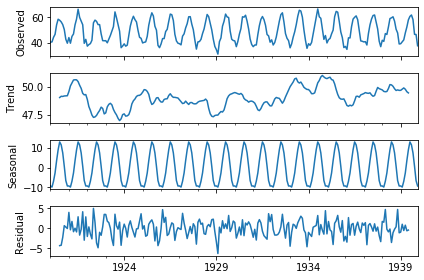

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottem_ts)
dplot = decomposed.plot()

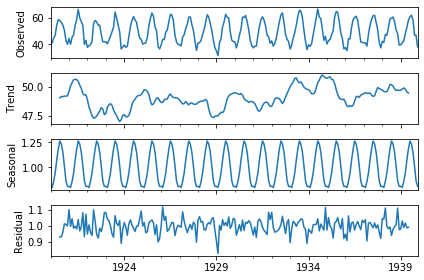

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottem_ts, model='multiplicative')
dplot = decomposed.plot()

In [8]:
# !pip install stldecompose

In [9]:
from stldecompose import decompose

In [10]:
stl = decompose(nottem_ts, period=12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

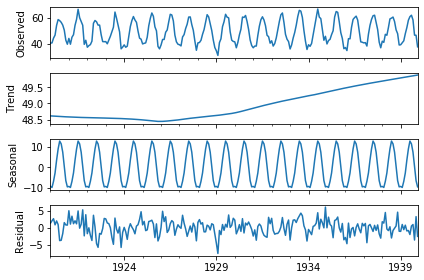

In [11]:
stl_visual = stl.plot()

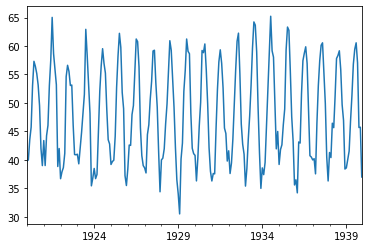

In [15]:
# seasonal adjustment

nottem_ts_adj = nottem_ts - decomposed.seasonal
nottem_ts_adj.plot()

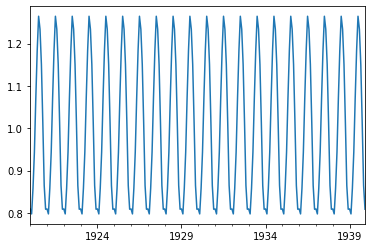

In [14]:
decomposed.seasonal.plot()

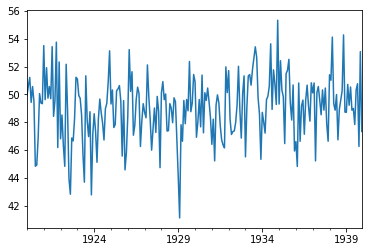

In [16]:
# seasonal adjustment

nottem_ts_adj_stl = nottem_ts - stl.seasonal
nottem_ts_adj_stl.plot()

In [18]:
# decomposotion based on srtl

from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [19]:
stl = decompose(nottem_ts, period=12)

fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal=True)

In [20]:
fcast.head()

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711


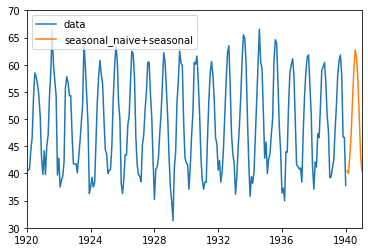

In [23]:
# plot of the forecast with the original data

plt.plot(nottem_ts, label='data')
plt.plot(fcast, label=fcast.columns[0])

plt.xlim('1920', '1941')
plt.ylim(30, 70)
plt.legend()